In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# import of emissions for EU countries
df_europe = pd.read_csv('final_df_UE.csv')
df_europe.head()

,Country,Sector,Gas,year,cons
0,Austria,Agriculture,All GHG,2019,7.21
1,Austria,Agriculture,CH4,2019,4.64
2,Austria,Agriculture,N2O,2019,2.57
3,Austria,Building,All GHG,2019,8.41
4,Austria,Building,CO2,2019,7.73


In [7]:
# creation of France dataframe
df_france = df_europe[df_europe['Country']== 'France']

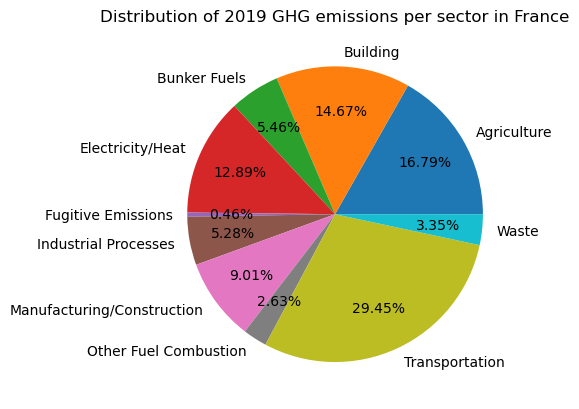

In [8]:
# distribution of global GHG emissions per sector in France in 2019 

sectors = ['Agriculture', 'Building', 'Bunker Fuels' ,'Electricity/Heat',
 'Fugitive Emissions', 'Industrial Processes',
'Manufacturing/Construction',
 'Other Fuel Combustion',
 'Transportation', 'Waste']

secteurs_2019 = df_france[(df_france['Sector'].isin(sectors)) &
                          (df_france['year'] == 2019) & 
                          (df_france['Gas'] == 'All GHG')]

plt.pie(secteurs_2019['cons'], 
        labels = secteurs_2019['Sector'],
        autopct = lambda x:str(round(x,2)) +'%',
        pctdistance = .7)

plt.title('Distribution of 2019 GHG emissions per sector in France');

In [9]:
# distribution of emissions per gas in France in 2019 
gas_2019 = df_france[(df_france['year'] == 2019) & 
                     (df_france['Sector'] == 'Total excluding LUCF')&
                     (df_france['Gas']!= 'All GHG')].groupby('Gas').sum()

gas_2019 



,year,cons
Gas,,
CH4,2019,59.66
CO2,2019,300.52
F-Gas,2019,15.61
N2O,2019,38.26


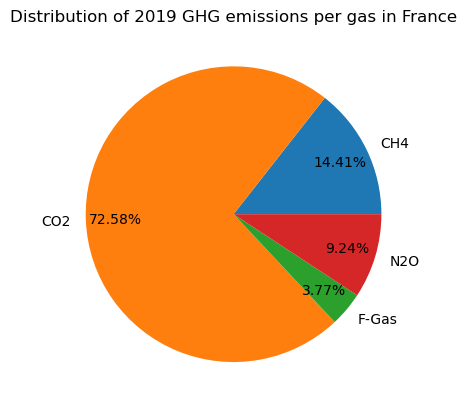

In [10]:
plt.pie(gas_2019['cons'], 
        labels = gas_2019.index,
        autopct = lambda x:str(round(x,2)) +'%',
        pctdistance = .8)

plt.title('Distribution of 2019 GHG emissions per gas in France');

In [11]:
#Evolution of each gas in France since 1990

evol_gas = df_france[df_france['Sector'] == 'Total including LUCF'].groupby(['year','Gas']).sum()
evol_gas


cons
year Gas            
1990 All GHG  471.02
     CH4       70.72
     CO2      331.39
     F-Gas      7.62
     N2O       61.30
...              ...
2019 All GHG  352.10
     CH4       59.68
     CO2      238.53
     F-Gas     15.61
     N2O       38.28

[150 rows x 1 columns]

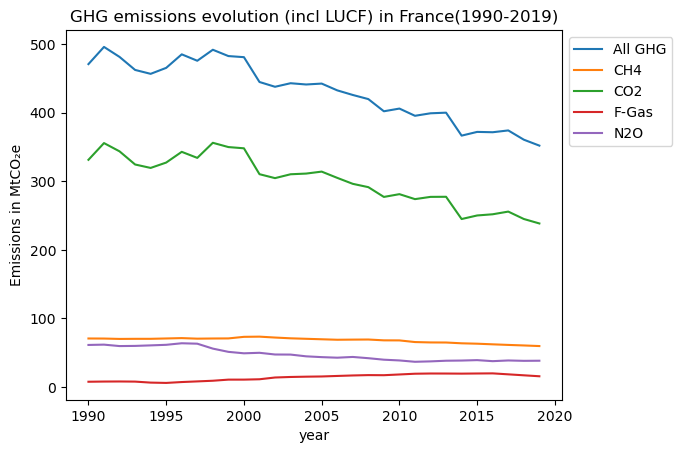

In [12]:
sns.lineplot(x = 'year', y = 'cons', hue='Gas',data = evol_gas);
plt.title('GHG emissions evolution (incl LUCF) in France(1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

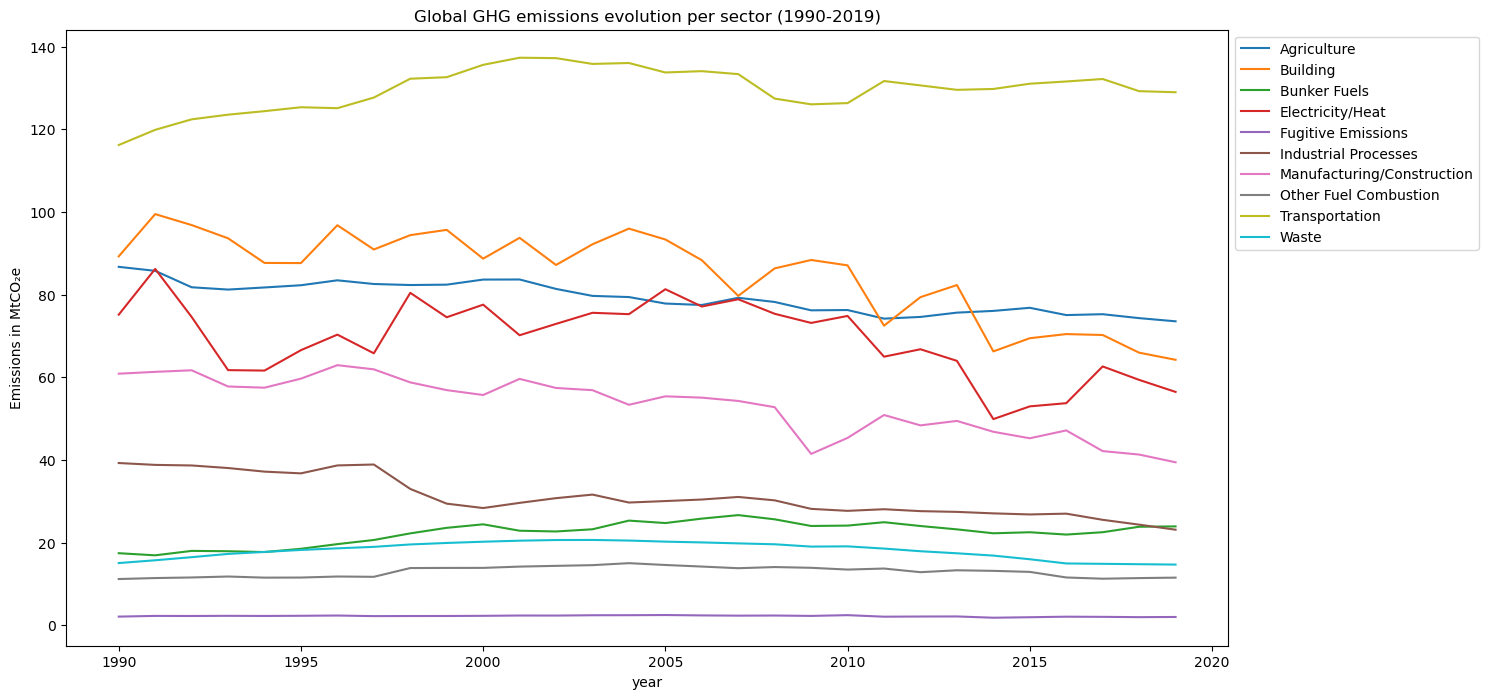

In [13]:
#Evolution of France global emissions per sector (excluding LUCF)
global_sectors = df_france[(df_france['Gas']=='All GHG') &
                   (df_france['Sector'].isin(sectors))]


plt.figure(figsize = (15,8))
sns.lineplot(x = 'year', y = 'cons', hue='Sector',data = global_sectors);
plt.title('Global GHG emissions evolution per sector (1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [14]:
global_sectors

,Country,Sector,Gas,year,cons
16860,France,Agriculture,All GHG,2019,73.55
16863,France,Building,All GHG,2019,64.24
16867,France,Bunker Fuels,All GHG,2019,23.93
16871,France,Electricity/Heat,All GHG,2019,56.47
16879,France,Fugitive Emissions,All GHG,2019,2.01
...,...,...,...,...,...
18536,France,Industrial Processes,All GHG,1990,39.26
18545,France,Manufacturing/Construction,All GHG,1990,60.88
18549,France,Other Fuel Combustion,All GHG,1990,11.19
18563,France,Transportation,All GHG,1990,116.21


In [16]:
sectors_LUCF = ['Agriculture', 'Building', 'Bunker Fuels' ,'Electricity/Heat',
 'Fugitive Emissions', 'Industrial Processes',
'Manufacturing/Construction',
 'Other Fuel Combustion',
 'Transportation', 'Waste', 'Land-Use Change and Forestry']
print(sectors_LUCF)

['Agriculture', 'Building', 'Bunker Fuels', 'Electricity/Heat', 'Fugitive Emissions', 'Industrial Processes', 'Manufacturing/Construction', 'Other Fuel Combustion', 'Transportation', 'Waste', 'Land-Use Change and Forestry']


In [18]:
# global emissions for LUCF in France
lucf = df_france[(df_france['Gas']=='All GHG') &
                   (df_france['Sector']== 'Land-Use Change and Forestry')]

lucf['cons'] = np.abs(lucf['cons'])
lucf

/var/folders/ff/f79vgl992991bqhf425lrmpm0000gn/T/ipykernel_36805/2489378189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucf['cons'] = np.abs(lucf['cons'])


,Country,Sector,Gas,year,cons
16888,France,Land-Use Change and Forestry,All GHG,2019,61.93
16945,France,Land-Use Change and Forestry,All GHG,2018,61.98
17002,France,Land-Use Change and Forestry,All GHG,2017,61.92
17059,France,Land-Use Change and Forestry,All GHG,2016,61.98
17116,France,Land-Use Change and Forestry,All GHG,2015,61.10
17173,France,Land-Use Change and Forestry,All GHG,2014,61.09
17230,France,Land-Use Change and Forestry,All GHG,2013,61.10
17287,France,Land-Use Change and Forestry,All GHG,2012,61.04
17344,France,Land-Use Change and Forestry,All GHG,2011,61.09
17401,France,Land-Use Change and Forestry,All GHG,2010,66.48


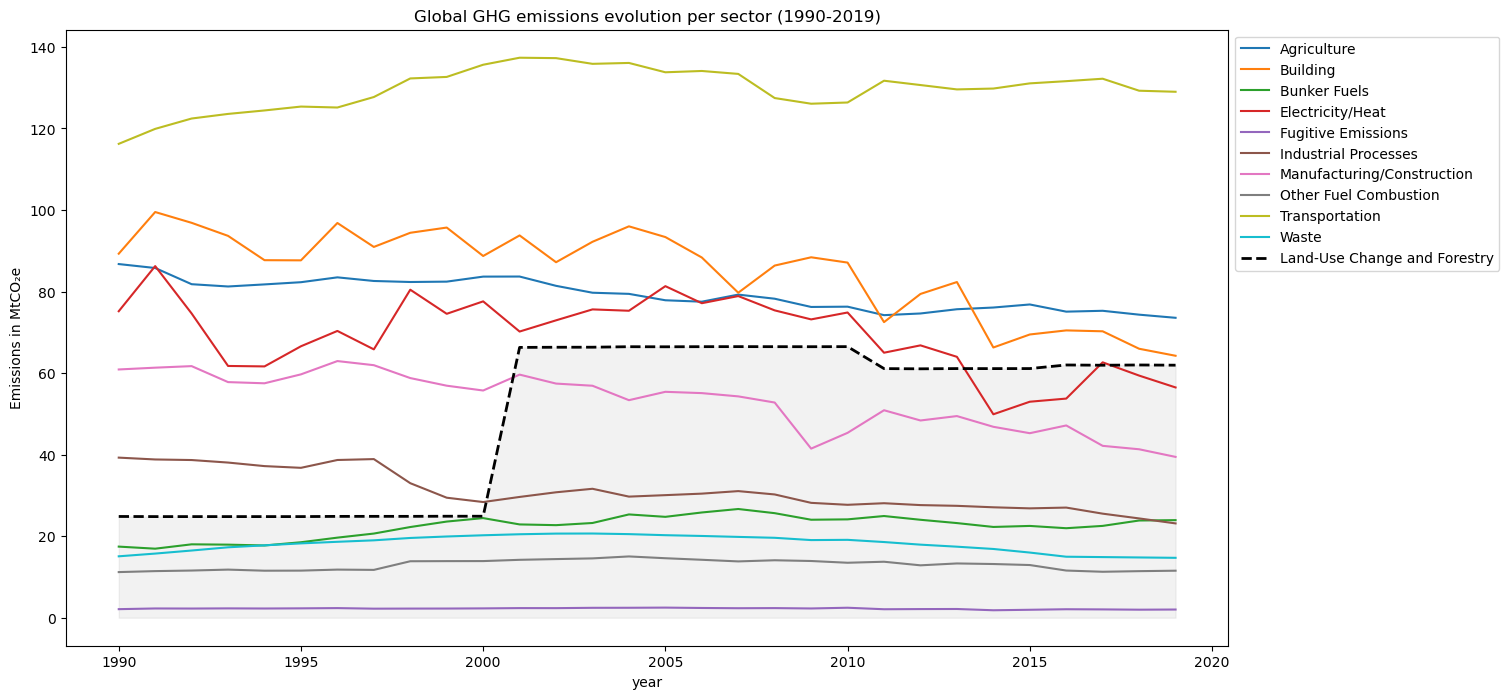

In [19]:
# Evolution of France global emissions per sector (including LUCF in absolute value)

fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.lineplot(x = 'year', y = 'cons', hue='Sector',data = global_sectors, ax = ax)
sns.lineplot(x = 'year', y = 'cons',data = lucf, linestyle = '--', linewidth = 2, color = 'black', label = 'Land-Use Change and Forestry', ax = ax)                    
ax.fill_between(lucf['year'], lucf['cons'], color='k', alpha=0.05)

plt.title('Global GHG emissions evolution per sector (1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

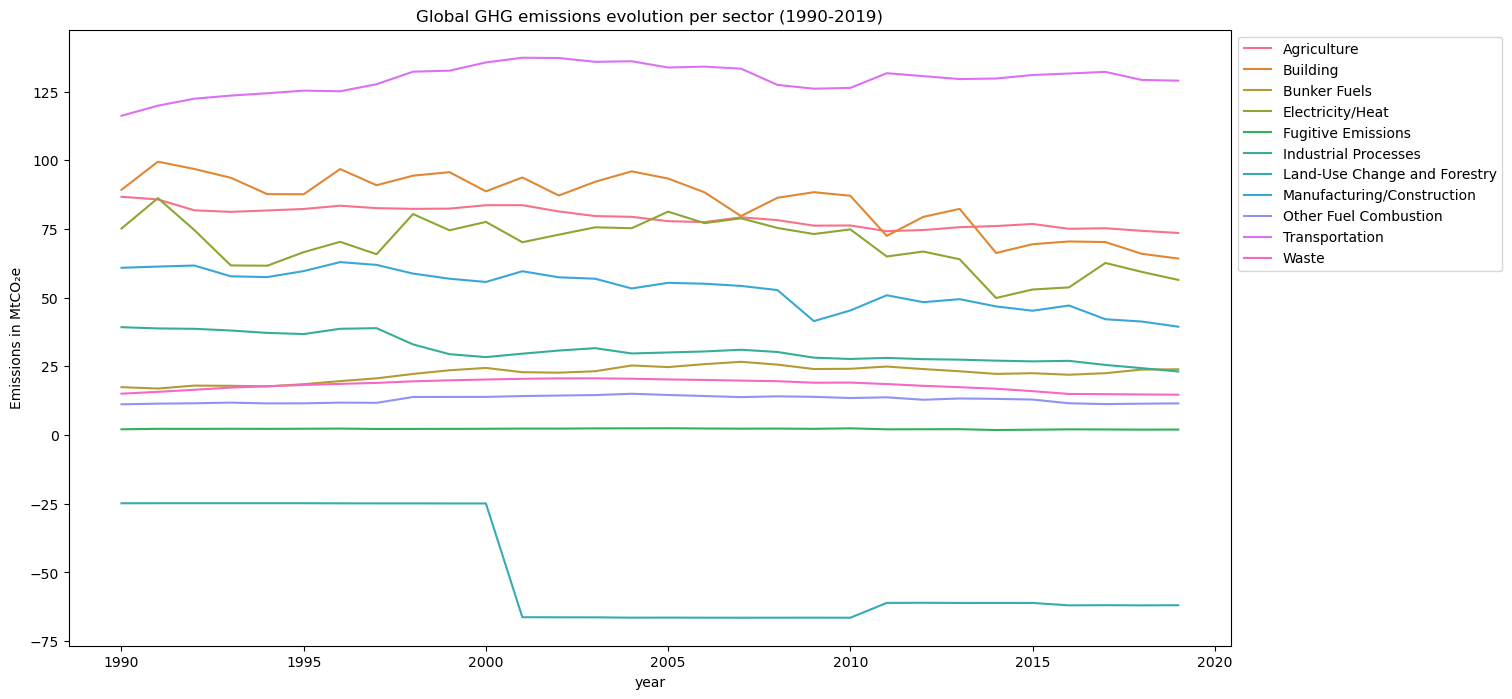

In [20]:
#Evolution of France global emissions per sector (including LUCF)
global_sectors_lucf = df_france[(df_france['Gas']=='All GHG') &
                   (df_france['Sector'].isin(sectors_LUCF))]


plt.figure(figsize = (15,8))
sns.lineplot(x = 'year', y = 'cons', hue='Sector',data = global_sectors_lucf);
plt.title('Global GHG emissions evolution per sector (1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [21]:
#Evolution of the distribution of emissions per sector in France

crosstab_sector = pd.crosstab(global_sectors['year'], global_sectors['Sector'], values = global_sectors['cons'],aggfunc = 'sum')
crosstab_sector

Sector,Agriculture,Building,Bunker Fuels,Electricity/Heat,Fugitive Emissions,Industrial Processes,Manufacturing/Construction,Other Fuel Combustion,Transportation,Waste
year,,,,,,,,,,
1990,86.73,89.27,17.44,75.16,2.10,39.26,60.88,11.19,116.21,15.06
1991,85.76,99.49,16.93,86.23,2.27,38.81,61.32,11.43,119.88,15.73
1992,81.79,96.84,18.00,74.61,2.25,38.67,61.70,11.57,122.42,16.48
1993,81.23,93.64,17.92,61.74,2.29,38.05,57.78,11.80,123.55,17.27
1994,81.74,87.68,17.72,61.63,2.26,37.18,57.49,11.53,124.40,17.75
1995,82.28,87.64,18.51,66.57,2.30,36.76,59.68,11.55,125.35,18.23
1996,83.47,96.80,19.64,70.33,2.36,38.68,62.94,11.80,125.12,18.62
1997,82.58,90.93,20.64,65.81,2.22,38.90,61.93,11.73,127.69,18.98
1998,82.33,94.40,22.24,80.44,2.24,32.99,58.77,13.85,132.25,19.56


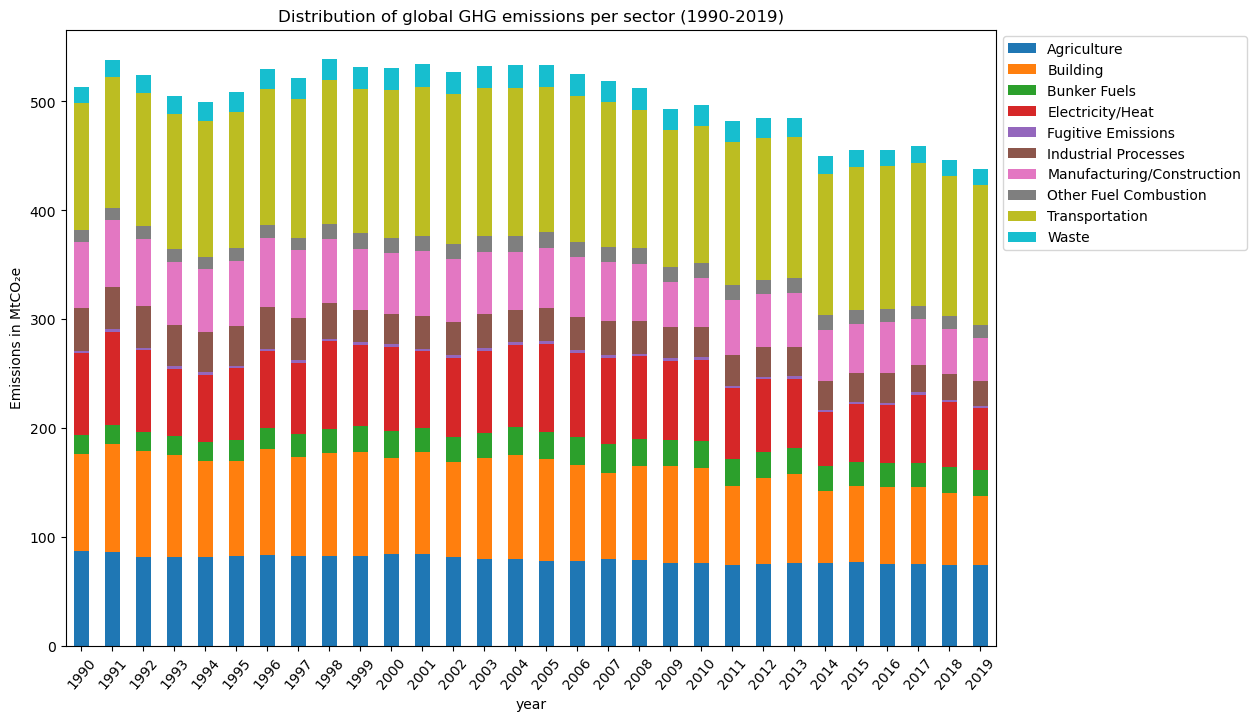

In [22]:
crosstab_sector.plot.bar(y= sectors, stacked = True, figsize = (12,8))

plt.xticks(rotation = 50)
plt.title('Distribution of global GHG emissions per sector (1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [23]:
#Evolution of the distribution of emissions per gas in France
all_gas= df_france[df_france['Gas']!= 'All GHG']

crosstab_gas = pd.crosstab(all_gas['year'], all_gas['Gas'], values = all_gas['cons'],aggfunc = 'sum')
crosstab_gas


Gas,CH4,CO2,F-Gas,N2O
year,,,,
1990,218.11,1381.66,22.86,187.53
1991,218.56,1479.33,23.70,189.09
1992,216.71,1433.23,24.03,182.77
1993,217.01,1357.23,23.46,183.38
1994,216.55,1336.76,19.08,185.61
1995,218.17,1369.02,17.70,188.17
1996,220.09,1432.95,21.54,195.05
1997,217.14,1398.94,24.36,193.12
1998,217.90,1488.09,27.24,171.71


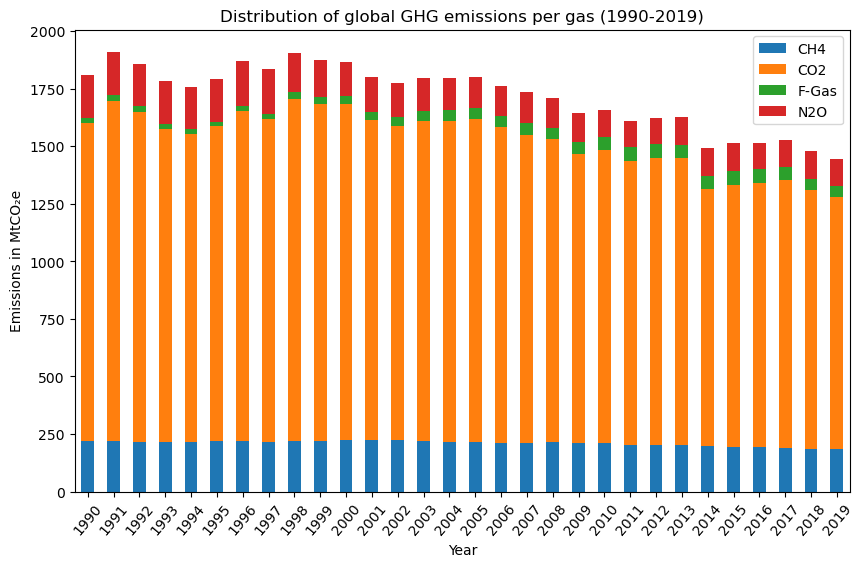

In [24]:
crosstab_gas.plot.bar(y=['CH4','CO2', 'F-Gas', 'N2O'], stacked = True, figsize=(10,6))
plt.xticks(rotation = 50)
plt.title('Distribution of global GHG emissions per gas (1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.xlabel('Year')
plt.legend(loc='upper right');

In [26]:
#import of population data
population = pd.read_csv('population_fr.csv', sep=';')
population.head(10)

,year,population
0,1990,57996401
1,1991,58280135
2,1992,58571237
3,1993,58852002
4,1994,59070077
5,1995,59280577
6,1996,59487413
7,1997,59691177
8,1998,59899347
9,1999,60122665


In [28]:
#import of pib data
pib = pd.read_csv('pib_fr.csv', sep=';')
pib.head(10)

,year,pib
0,1990,1480.3
1,1991,1495.8
2,1992,1519.7
3,1993,1510.2
4,1994,1545.8
5,1995,1578.4
6,1996,1600.7
7,1997,1638.0
8,1998,1696.8
9,1999,1754.9


In [29]:
#import of energy data
energy = pd.read_csv('production_primaire_ENR.csv', sep=';')
energy.head()

,year,renewable_primary_prod
0,1990,177
1,1991,199
2,1992,207
3,1993,198
4,1994,200


In [30]:
# merging population, pib and energy
df_global_emissions = df_france[(df_france['Gas']=='All GHG') & (df_france['Sector']=='Total excluding LUCF')].sort_values('year')
df_all = df_global_emissions.merge(population, on= 'year')
df_all = df_all.merge(pib, on='year')
df_all = df_all.merge(energy, on='year')
df_all

,Country,Sector,Gas,year,cons,population,pib,renewable_primary_prod
0,France,Total excluding LUCF,All GHG,1990,495.85,57996401,1480.3,177
1,France,Total excluding LUCF,All GHG,1991,520.92,58280135,1495.8,199
2,France,Total excluding LUCF,All GHG,1992,506.34,58571237,1519.7,207
3,France,Total excluding LUCF,All GHG,1993,487.35,58852002,1510.2,198
4,France,Total excluding LUCF,All GHG,1994,481.65,59070077,1545.8,200
5,France,Total excluding LUCF,All GHG,1995,490.36,59280577,1578.4,198
6,France,Total excluding LUCF,All GHG,1996,510.10,59487413,1600.7,200
7,France,Total excluding LUCF,All GHG,1997,500.77,59691177,1638.0,188
8,France,Total excluding LUCF,All GHG,1998,516.82,59899347,1696.8,186
9,France,Total excluding LUCF,All GHG,1999,507.64,60122665,1754.9,192


In [31]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 30 non-null     object 
 1   Sector                  30 non-null     object 
 2   Gas                     30 non-null     object 
 3   year                    30 non-null     int64  
 4   cons                    30 non-null     float64
 5   population              30 non-null     int64  
 6   pib                     30 non-null     float64
 7   renewable_primary_prod  30 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.1+ KB


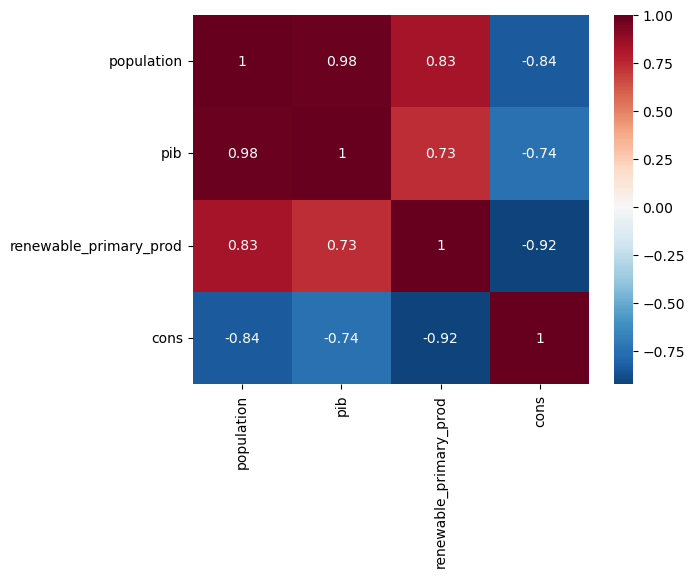

In [32]:
sns.heatmap(df_all[['population','pib', 'renewable_primary_prod','cons']].corr(), annot = True, center =0, cmap = 'RdBu_r');

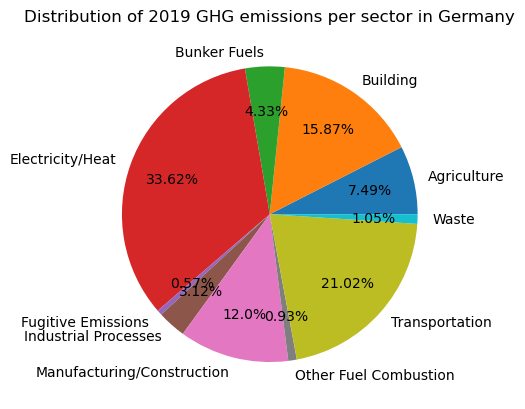

In [33]:
# Germany sectors in 2019

sectors_germany = df_europe[(df_europe['Country']=='Germany') &
                          (df_europe['Sector'].isin(sectors)) &
                          (df_europe['year'] == 2019) & 
                          (df_europe['Gas'] == 'All GHG')]

plt.pie(sectors_germany['cons'], 
        labels = sectors_germany['Sector'],
        autopct = lambda x:str(round(x,2)) +'%',
        pctdistance = .7)

plt.title('Distribution of 2019 GHG emissions per sector in Germany');


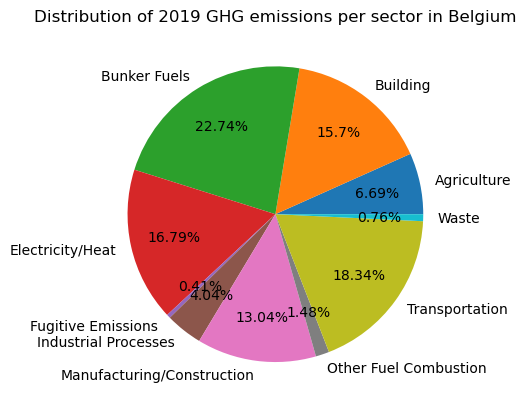

In [34]:
# Belgium sectors in 2019

sectors_belgium = df_europe[(df_europe['Country']=='Belgium') &
                          (df_europe['Sector'].isin(sectors)) &
                          (df_europe['year'] == 2019) & 
                          (df_europe['Gas'] == 'All GHG')]

plt.pie(sectors_belgium['cons'], 
        labels = sectors_belgium['Sector'],
        autopct = lambda x:str(round(x,2)) +'%',
        pctdistance = .7)

plt.title('Distribution of 2019 GHG emissions per sector in Belgium');


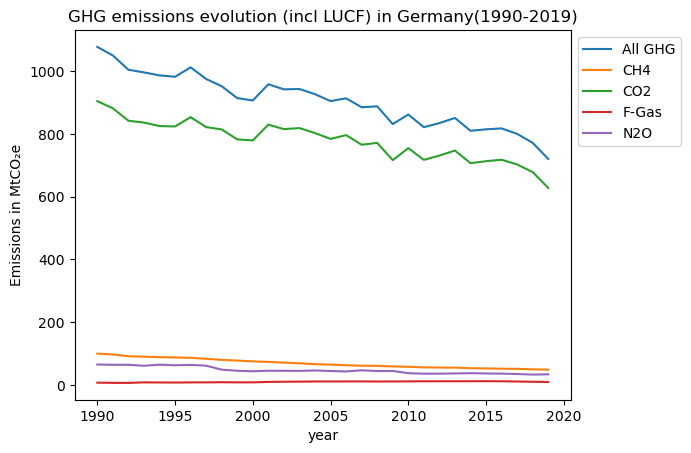

In [35]:
#evolution in germany

evol_germany = df_europe[(df_europe['Country']=='Germany') &
                          (df_europe['Sector']=='Total including LUCF') ].groupby(['year','Gas']).sum()

sns.lineplot(x = 'year', y = 'cons', hue='Gas',data = evol_germany);
plt.title('GHG emissions evolution (incl LUCF) in Germany(1990-2019)')
plt.ylabel('Emissions in MtCO₂e')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [36]:
evol_fr_de = df_europe[(df_europe['Country'].isin(['France', 'Germany'])) &
                          (df_europe['Sector']=='Total including LUCF') ].sort_values(['year','Country','Gas'])

evol_fr_de

,Country,Sector,Gas,year,cons
18558,France,Total including LUCF,All GHG,1990,471.02
18560,France,Total including LUCF,CH4,1990,70.72
18559,France,Total including LUCF,CO2,1990,331.39
18562,France,Total including LUCF,F-Gas,1990,7.62
18561,France,Total including LUCF,N2O,1990,61.30
...,...,...,...,...,...
8445,Germany,Total including LUCF,All GHG,2019,720.23
8447,Germany,Total including LUCF,CH4,2019,48.71
8446,Germany,Total including LUCF,CO2,2019,627.92
8449,Germany,Total including LUCF,F-Gas,2019,9.48


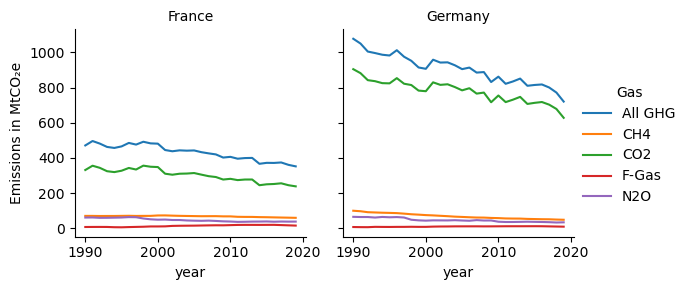

In [37]:
g= sns.FacetGrid(evol_fr_de, col = 'Country', hue= 'Gas')
g.map(plt.plot, 'year', 'cons')
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("year", "Emissions in MtCO₂e");

In [38]:
#analyse série temporelle

df_series = df_all[['cons']]
df_series.index = df_all['year']

df_series.index = pd.to_datetime(df_series.index, format='%Y')
df_series

,cons
year,
1990-01-01,495.85
1991-01-01,520.92
1992-01-01,506.34
1993-01-01,487.35
1994-01-01,481.65
1995-01-01,490.36
1996-01-01,510.10
1997-01-01,500.77
1998-01-01,516.82


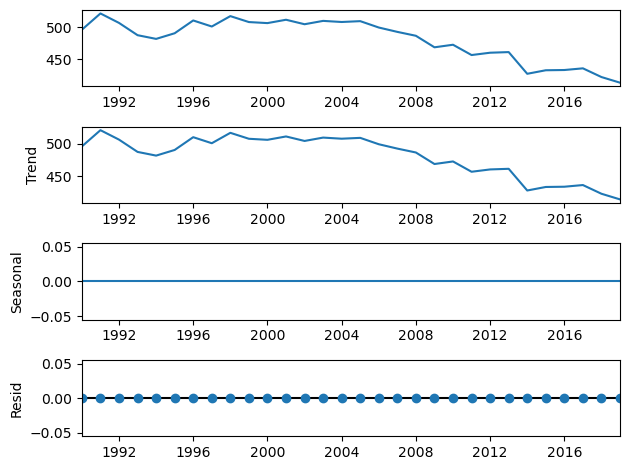

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_series)
result.plot()
plt.show();